In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 243 entries, Province/State to 9/16/20
dtypes: float64(2), int64(239), object(2)
memory usage: 505.1+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 243 entries, Province/State to 9/16/20
dtypes: float64(2), int64(239), object(2)
memory usage: 505.1+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


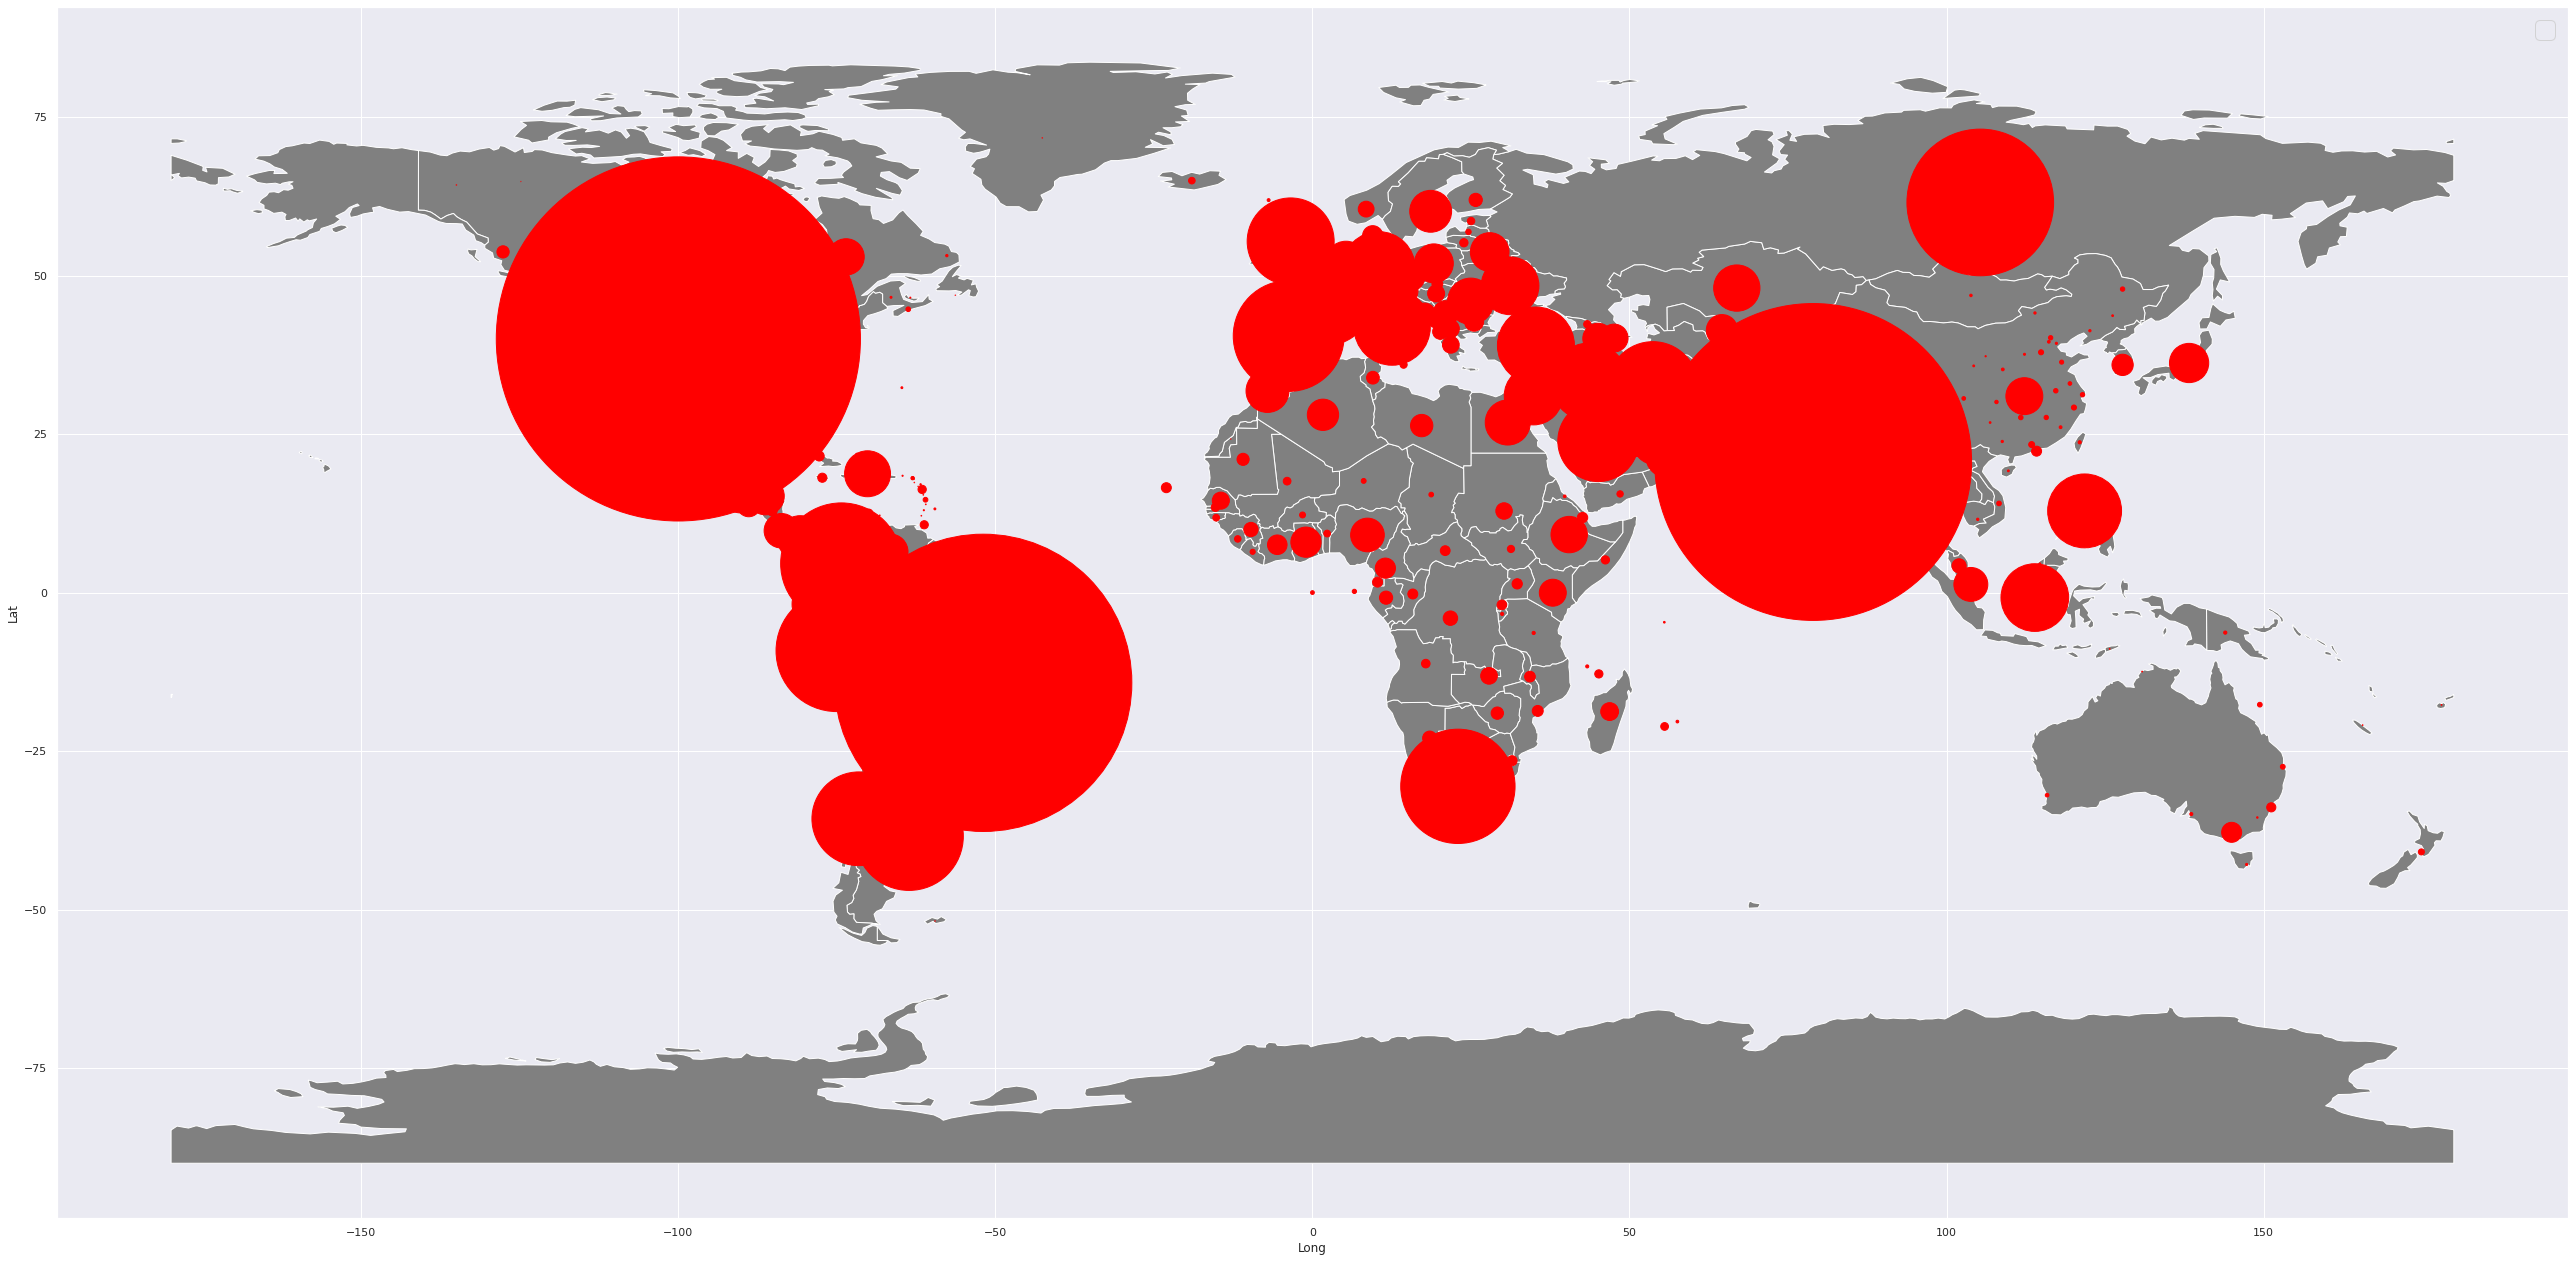

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9/12/20,20928,2434658,213191,150376,231953,85054,3723206,18226,90445,1502
9/13/20,20928,2451406,213634,150376,232541,85086,3723206,18489,90445,1513
9/14/20,21206,2474570,213950,150376,234017,85101,3770138,18878,90432,1528
9/15/20,21536,2495127,214645,150376,235112,85129,3811505,19310,90816,1545


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9/12/20,55454,101041,81658,4818,26851,67136,103092,3623,2993,4653
9/13/20,55454,101745,81909,4818,26928,67789,103660,3771,3042,4684
9/14/20,57361,102204,82172,4818,27009,68620,104110,3933,3141,4726
9/15/20,58137,102832,82684,4961,27088,68620,104803,4042,3223,4803


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9/12/20,590,2155,2949,144,782,2065,1953,40,51,108
9/13/20,590,2166,2957,144,785,2079,1968,42,53,108
9/14/20,621,2173,2972,144,788,2087,1984,44,55,108
9/15/20,633,2187,2984,147,792,2087,1998,46,56,108


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9/12/20,55454,101041,81658,4818,26851,67136,103092,3623,2993,4653
9/13/20,55454,101745,81909,4818,26928,67789,103660,3771,3042,4684
9/14/20,57361,102204,82172,4818,27009,68620,104110,3933,3141,4726
9/15/20,58137,102832,82684,4961,27088,68620,104803,4042,3223,4803


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9/12/20,590,2155,2949,144,782,2065,1953,40,51,108
9/13/20,590,2166,2957,144,785,2079,1968,42,53,108
9/14/20,621,2173,2972,144,788,2087,1984,44,55,108
9/15/20,633,2187,2984,147,792,2087,1998,46,56,108


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9/12/20,1.027516,1.007087,1.008011,1.00000,1.002913,1.016457,1.008412,1.031900,1.059469,1.013063
9/13/20,1.000000,1.006967,1.003074,1.00000,1.002868,1.009727,1.005510,1.040850,1.016372,1.006662
9/14/20,1.034389,1.004511,1.003211,1.00000,1.003008,1.012259,1.004341,1.042959,1.032544,1.008967
9/15/20,1.013528,1.006145,1.006231,1.02968,1.002925,1.000000,1.006656,1.027714,1.026106,1.016293


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,95,95,95,95,95,95,95,95,95,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,2585,2721,2721,2814,2928,2928,3008,3032,3087,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,180,180,180,180,180,181,183,184,185,POINT (-59.54320 13.19390)
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,1361,1365,1365,1435,1458,1480,1501,1528,1536,POINT (-88.49760 17.18990)
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1086,1086,1086,1086,1086,1086,1086,1086,1086,POINT (-63.74430 44.68200)
89,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,671533,686851,694664,702088,708964,716319,721892,728590,736377,POINT (-74.29730 4.57090)
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,49897,51224,52549,53969,55454,55454,57361,58137,59516,POINT (-83.75340 9.74890)
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,4377,4459,4551,4593,4653,4684,4726,4803,4876,POINT (-77.78117 21.52176)
104,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,22,22,24,24,24,24,24,24,24,POINT (-61.37100 15.41500)
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,100131,100937,101716,102232,103092,103660,104110,104803,105521,POINT (-70.16270 18.73570)


In [36]:
temp.drop([24,47,89,104,118,119,123,133,177,187, 210, 212, 229,242,246, 247, 248,254,255,259], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,95,95,95,95,95,95,95,95,95,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,2585,2721,2721,2814,2928,2928,3008,3032,3087,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,180,180,180,180,180,181,183,184,185,POINT (-59.54320 13.19390)
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,49897,51224,52549,53969,55454,55454,57361,58137,59516,POINT (-83.75340 9.74890)
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,4377,4459,4551,4593,4653,4684,4726,4803,4876,POINT (-77.78117 21.52176)
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,100131,100937,101716,102232,103092,103660,104110,104803,105521,POINT (-70.16270 18.73570)
108,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,26511,26602,26688,26773,26851,26928,27009,27088,27163,POINT (-88.89650 13.79420)
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,9387,9418,9462,9494,9521,9521,9552,9578,9595,POINT (-53.12580 3.93390)
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,239,256,256,256,256,256,330,330,330,POINT (-63.05010 18.07080)
134,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,78721,79622,80306,81009,81658,81909,82172,82684,82924,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'9/15/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,9/15/20,9/16/20
0,NaN,Dominican Republic,104803,105521
1,NaN,Panama,102832,103466
2,NaN,Guatemala,82684,82924
3,NaN,Honduras,68620,69660
4,NaN,Costa Rica,58137,59516
5,NaN,El Salvador,27088,27163
6,French Guiana,France,9578,9595
7,NaN,Haiti,8530,8541
8,NaN,Nicaragua,4961,4961
9,NaN,Cuba,4803,4876


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,58,59,63,63,65,67,67,68,69,69
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,16,16,18,18,19,19,19,19,19,19
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,65,65,65,65,65,65,65,65,65,65
89,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,21615,21611,22053,22275,22518,22734,22924,23123,23288,23478
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,510,531,543,567,583,590,590,621,633,649
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,102,104,104,106,106,108,108,108,108,109
104,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1864,1889,1914,1926,1941,1953,1968,1984,1998,2009


In [49]:
temp_deaths.drop([24,47,89,104,118,119,123,133,177,187, 210, 212, 229,242,246, 247, 248,254,255,259], axis=0, inplace=True)

In [50]:

temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,58,59,63,63,65,67,67,68,69,69
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,510,531,543,567,583,590,590,621,633,649
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,102,104,104,106,106,108,108,108,108,109
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1864,1889,1914,1926,1941,1953,1968,1984,1998,2009
108,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,764,765,770,774,777,782,785,788,792,796
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,62,62,62,63,63,63,63,63,64,65
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
134,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,2862,2890,2897,2918,2929,2949,2957,2972,2984,3009


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'9/15/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,9/15/20,9/16/20
0,NaN,Guatemala,2984,3009
1,NaN,Panama,2187,2198
2,NaN,Honduras,2087,2102
3,NaN,Dominican Republic,1998,2009
4,NaN,El Salvador,792,796
5,NaN,Costa Rica,633,649
6,NaN,Haiti,220,220
7,NaN,Nicaragua,147,147
8,NaN,Cuba,108,109
9,NaN,Bahamas,69,69


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,976,976,1183,1183,1220,1319,1319,1391,1482,1533
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,154,156,156,157,158,158,164,165,169,171
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,314,321,326,326,404,458,492,540,663,696
76,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,529279,529017,552885,569479,582694,592820,599385,606925,607978,610078
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,19083,19285,19544,20322,20710,20928,20928,21206,21536,21752
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,3642,3700,3727,3779,3844,3878,3930,4040,4119,4131
91,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,73228,73795,74305,75034,75747,76531,77182,77790,78387,78891
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,16137,16462,16786,17106,17433,17874,18397,18924,19450,19960


In [59]:
temp_recovered.drop([24,76,91,105,106,110,120,164,174,197,199,216,229,233,235,241,242,246], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,976,976,1183,1183,1220,1319,1319,1391,1482,1533
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,154,156,156,157,158,158,164,165,169,171
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,19083,19285,19544,20322,20710,20928,20928,21206,21536,21752
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,3642,3700,3727,3779,3844,3878,3930,4040,4119,4131
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,73228,73795,74305,75034,75747,76531,77182,77790,78387,78891
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,16137,16462,16786,17106,17433,17874,18397,18924,19450,19960
103,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,8902,8946,8986,9040,9078,9132,9132,9156,9202,9235
112,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,79,79,107,107,107,107,107,206,206,206
121,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,66584,67462,68308,68927,69703,70403,70927,71352,71983,72562


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'9/15/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,9/15/20,9/16/20
0,NaN,Dominican Republic,78387,78891
1,NaN,Panama,75592,76787
2,NaN,Guatemala,71983,72562
3,NaN,Costa Rica,21536,21752
4,NaN,Honduras,18487,19983
5,NaN,El Salvador,19450,19960
6,French Guiana,France,9202,9235
7,NaN,Haiti,6181,6258
8,NaN,Cuba,4119,4131
9,NaN,Nicaragua,2913,2913


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,95,95,95,95,95,95,95,95,95,95
1,Bahamas,0,0,0,0,0,0,0,0,0,...,2546,2585,2721,2721,2814,2928,2928,3008,3032,3087
2,Barbados,0,0,0,0,0,0,0,0,0,...,179,180,180,180,180,180,181,183,184,185
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,48780,49897,51224,52549,53969,55454,55454,57361,58137,59516
4,Cuba,0,0,0,0,0,0,0,0,0,...,4352,4377,4459,4551,4593,4653,4684,4726,4803,4876
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,99898,100131,100937,101716,102232,103092,103660,104110,104803,105521
6,El Salvador,0,0,0,0,0,0,0,0,0,...,26413,26511,26602,26688,26773,26851,26928,27009,27088,27163
7,French Guiana,0,0,0,0,0,0,0,0,0,...,9355,9387,9418,9462,9494,9521,9521,9552,9578,9595
8,St Martin,0,0,0,0,0,0,0,0,0,...,239,239,256,256,256,256,256,330,330,330
9,Guatemala,0,0,0,0,0,0,0,0,0,...,77828,78721,79622,80306,81009,81658,81909,82172,82684,82924


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,58,59,63,63,65,67,67,68,69,69
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,510,531,543,567,583,590,590,621,633,649
4,Cuba,0,0,0,0,0,0,0,0,0,...,102,104,104,106,106,108,108,108,108,109
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,1864,1889,1914,1926,1941,1953,1968,1984,1998,2009
6,El Salvador,0,0,0,0,0,0,0,0,0,...,764,765,770,774,777,782,785,788,792,796
7,French Guiana,0,0,0,0,0,0,0,0,0,...,62,62,62,63,63,63,63,63,64,65
8,St Martin,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
9,Guatemala,0,0,0,0,0,0,0,0,0,...,2862,2890,2897,2918,2929,2949,2957,2972,2984,3009


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
1,Bahamas,0,0,0,0,0,0,0,0,0,...,976,976,1183,1183,1220,1319,1319,1391,1482,1533
2,Barbados,0,0,0,0,0,0,0,0,0,...,154,156,156,157,158,158,164,165,169,171
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,19083,19285,19544,20322,20710,20928,20928,21206,21536,21752
4,Cuba,0,0,0,0,0,0,0,0,0,...,3642,3700,3727,3779,3844,3878,3930,4040,4119,4131
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,73228,73795,74305,75034,75747,76531,77182,77790,78387,78891
6,El Salvador,0,0,0,0,0,0,0,0,0,...,16137,16462,16786,17106,17433,17874,18397,18924,19450,19960
7,French Guiana,0,0,0,0,0,0,0,0,0,...,8902,8946,8986,9040,9078,9132,9132,9156,9202,9235
8,St Martin,0,0,0,0,0,0,0,0,0,...,79,79,107,107,107,107,107,206,206,206
9,Guatemala,0,0,0,0,0,0,0,0,0,...,66584,67462,68308,68927,69703,70403,70927,71352,71983,72562


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(201, 22)

In [75]:
recovered_camcar_all.shape

(201, 23)

In [76]:
deaths_camcar_all.shape

(201, 22)

In [77]:
active_camcar_all.shape

(201, 23)